Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 9.30

Analysis of the gross cell product, which quantifies the economic output of small regions all over the world. Due to the presence of large outliers, the sample mean does not produce a reliable estimate of the population mean\
Topics and relevant videos: [Law of large numbers,consistency of the sample mean](https://www.youtube.com/watch?v=MmqywUdajQs), [sensitivity of the sample mean to outliers](https://www.youtube.com/watch?v=sqNtpYvqNfU)

Author: Carlos Fernandez-Granda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from numpy.random import default_rng
rng = default_rng(2022)

font_size = 15
font_size_legend = 15
font_size_ticks = 15

data_aux = pd.read_csv('../data/Gecon40_post_final.csv')
data_aux.dropna(subset=['MER2005_40'],inplace=True)
data = pd.to_numeric(data_aux['MER2005_40'], errors = 'coerce')
data.dropna(inplace=True)

N = len(data)
population_mean = np.mean(data)
population_std = np.std(data)
population_median = np.median(data)
print("N: " + str(N))
print("Population mean: " + str(round(population_mean,3)))
print("Population standard deviation: " + str(round(population_std,3)))
print("Median: " + str(round(population_median,3)))

N: 20100
Population mean: 2.064
Population standard deviation: 17.66
Median: 0.029


/var/folders/1r/8drxnfc95_q25t4qy8ng2md80000gn/T/ipykernel_59345/3505691717.py:13: DtypeWarning: Columns (16,19,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data_aux = pd.read_csv('../data/Gecon40_post_final.csv')


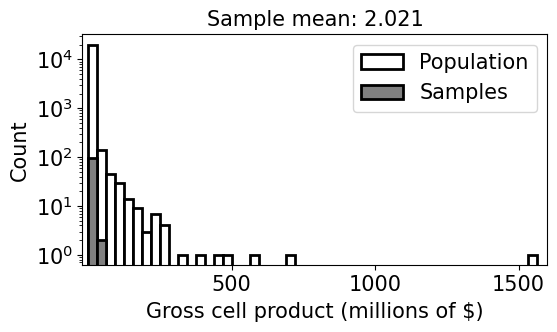

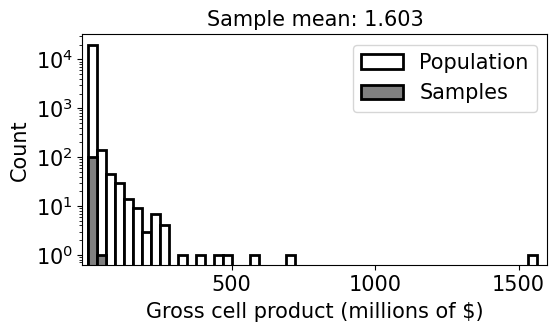

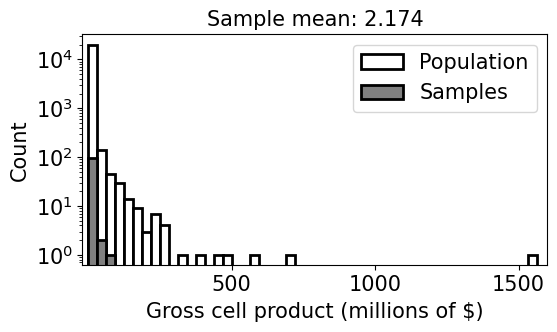

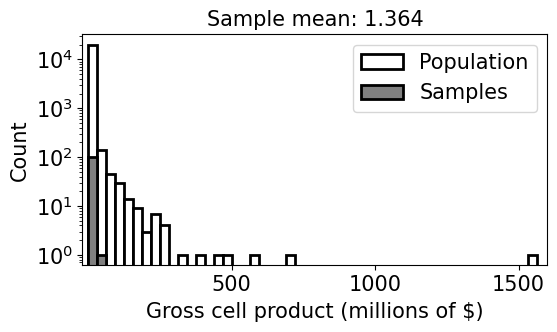

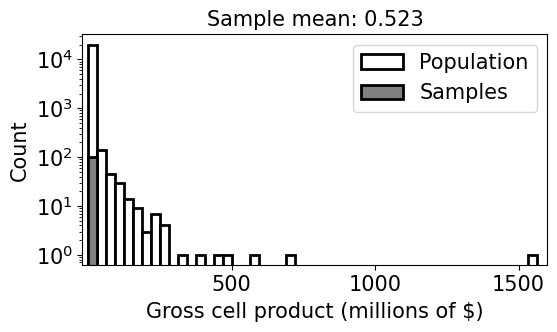

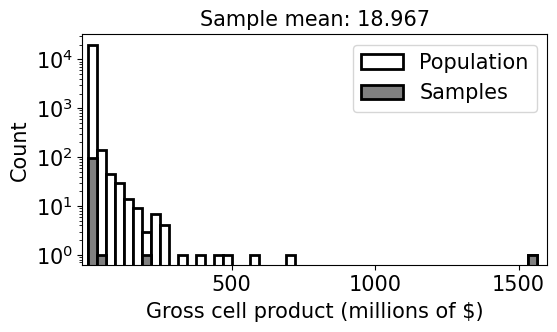

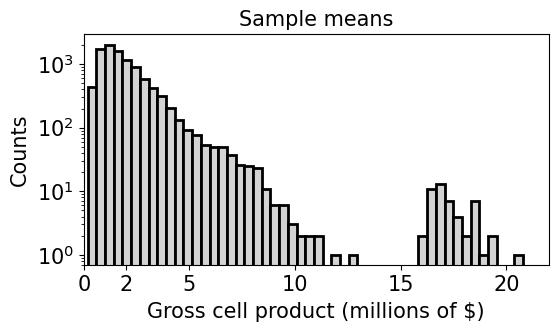

In [2]:
n_bins = 50
x_min = -20
x_max = 1600
tries = 5
n = 100
tick_vals = [500,1000,1500]
for ind in range(tries):
    samples = rng.choice(data,n,replace=True)
    
    plt.figure(figsize=(6,3))
    plt.xticks(tick_vals,fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    (aux_1, bins,aux_2) = plt.hist(data,bins=n_bins,color='white', edgecolor='black',log=True,
              linewidth=2,label="Population")
    plt.hist(samples,bins=bins,color='gray', edgecolor='black',log=True,
              linewidth=2,label="Samples")
    plt.xlim([x_min,x_max])
    plt.ylabel(r"Count",fontsize=font_size)
    plt.xlabel(r'Gross cell product (millions of \$)',fontsize=font_size,labelpad=5)
    plt.legend(fontsize=font_size)
    plt.title("Sample mean: " + str(round(np.mean(samples),3)),fontsize=font_size)
    
# From time to time the sample mean can be very large when an outlier is included
tries_max = 1000
max_mean = 0
for ind in range(tries_max):
    samples = rng.choice(data,n,replace=True)
    if np.mean(samples)>max_mean:
        max_samples = samples
        max_mean = np.mean(samples)

plt.figure(figsize=(6,3))
plt.xticks(tick_vals,fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
(aux_1, bins,aux_2) = plt.hist(data,bins=n_bins,color='white', edgecolor='black',log=True,
          linewidth=2,label="Population")
plt.hist(max_samples,bins=bins,color='gray', edgecolor='black',log=True,
          linewidth=2,label="Samples")
plt.xlim([x_min,x_max])
plt.ylabel(r"Count",fontsize=font_size)
plt.xlabel(r'Gross cell product (millions of \$)',fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size)
plt.title("Sample mean: " + str(round(max_mean,3)),fontsize=font_size)
    
more_tries = int(1e4)
sample_means = np.zeros(more_tries)
for ind_tries in range(more_tries):
    samples = rng.choice(data,n,replace=True)
    sample_means[ind_tries] = np.mean(samples)
plt.figure(figsize=(6,3))
plt.xticks([0,2,5,10,15,20],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(sample_means,bins=n_bins,color='lightgray', edgecolor='black',linewidth=2,log=True,
              density=False)
plt.xlim([0,22])
plt.ylabel(r"Counts",fontsize=font_size,labelpad=5)
plt.xlabel(r'Gross cell product (millions of \$)',fontsize=font_size,labelpad=5)
plt.title("Sample means",fontsize=font_size);

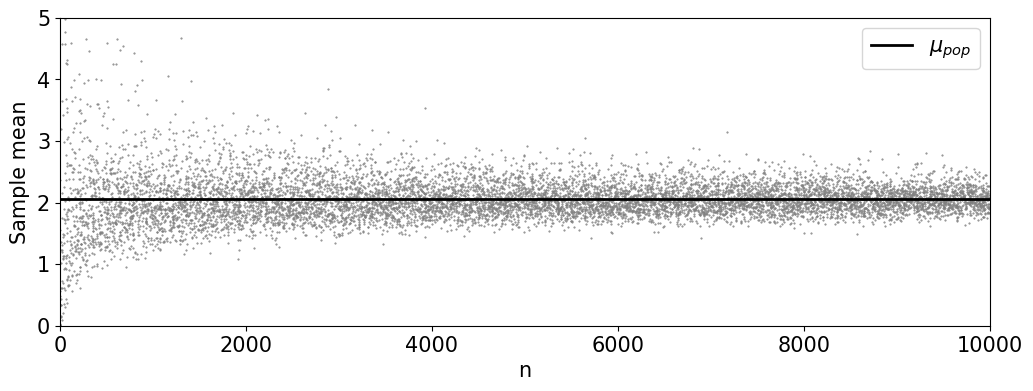

In [3]:
# Convergence to the population mean occurs, but it is very slow due to the large population variance, which results in a large standard error
tries = 10
n_vals = np.arange(1,10000,10)
sample_mean_average = np.zeros(N)
sample_mean_std = np.zeros(N)

ymin = 0
ymax = 5

plt.figure(figsize=(12,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim(ymin,ymax)
plt.xlim(0,1e4)
for ind_n,n in enumerate(n_vals):
    sample_means = np.zeros(tries)
    for ind_tries in range(tries):
        samples = rng.choice(data,n,replace=True)
        sample_means[ind_tries] = np.mean(samples)
    plt.plot(n * np.ones(tries),sample_means,'.',ms=1,color="gray")
plt.plot(n_vals,np.ones(len(n_vals))*population_mean,lw=2,color='black',
         label=r"$\mu_{pop}$")
plt.ylabel(r"Sample mean",fontsize=font_size,labelpad=5)
plt.xlabel("n",fontsize=font_size)
plt.legend(fontsize=font_size);